# Очистка данных

In [19]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import re

from itertools import combinations
from scipy.stats import ttest_ind
from datetime import datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

%matplotlib inline

In [ ]:
Restaurant_id — идентификационный номер ресторана / сети ресторанов;

City — город, в котором находится ресторан;

Cuisine Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;

Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города;

Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);

Price Range — диапазон цен в ресторане;

Number of Reviews — количество отзывов о ресторане;

Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;

URL_TA — URL страницы ресторана на TripAdvosor;

ID_TA — идентификатор ресторана в базе данных TripAdvisor.

In [21]:
df = pd.read_csv('main_task.csv')
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


# Функции

In [77]:
#Заполнение значений наших новых столбцов
def find_item(cell):
    if item in cell:
        return 1
    return 0

In [78]:
# плотность распределения переменных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='rating',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [79]:
# статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [80]:
# распределение признака числовых переменных и количество пустых строк
def get_charts_col(column):
    df[column].hist()
    display(df[column].describe())
    print('Количество заполненных значений - ' + str(df[column].count()) +
          ' из 40000')

In [81]:
# формул интерквартильного расстояния для фильтра выбросов
def get_emission_filter(column, a=0, b=10):
    median = df[column].median()
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    perc25 = df[column].quantile(0.25)
    perc75 = df[column].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    df[column].loc[df[column].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10, range=(a, b),
                                                                                              label='IQR')
    plt.legend()

In [82]:
#Названия столбцов приведем к нижнему регистру и заменим пробелы в названиях на нижнее подчеркивание
df.columns = df.columns.str.lower()
df.columns = [str(x).replace(' ', '_') for x in df.columns]
df.head(2)

,restaurant_id,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,count_restaurant,cuisine_count,delta,delta_today,_creole,afghani,african,albanian,american,arabic,argentinean,armenian,asian,australian,austrian,azerbaijani,...,'sri_lankan','cambodian','albanian','new_zealand','croatian','central_asian','filipino','tunisian','cajun_&_creole','romanian','georgian','polynesian','azerbaijani','caucasian','afghani','uzbek','salvadoran','yunnan','native_american','canadian','xinjiang','burmese','fujian','welsh','latvian'
0,id_5569,"[European, French, International]",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,3,3.0,41,1242,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,id_5569,"[European, French, International]",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,3,3.0,41,1242,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
#Выведем уникальные значения в столбцах и значения, встретившиеся более 10 раз.
for column in df.columns:
    print('-'*60)
    print('\t' , 'Отчет по колонке [', column, ']', '\t'*5)
    print('-'*60)
    print("Значений, встретившихся в столбце более 10 раз:",
          (df[column].value_counts() > 10).sum())
    print("Уникальных значений:", df[column].nunique())
    print('Все уникальные значения:', df[column].unique() , '\n')
            
    display(pd.DataFrame(df[column].value_counts()))

------------------------------------------------------------
	 Отчет по колонке [ restaurant_id ] 					
------------------------------------------------------------
Значений, встретившихся в столбце более 10 раз: 2879
Уникальных значений: 11909
Все уникальные значения: ['id_5569' 'id_1535' 'id_352' ... 'id_7068' 'id_8887' 'id_6057'] 



,restaurant_id
id_71,93
id_227,89
id_38,87
id_79,86
id_54,85
...,...
id_10211,1
id_5330,1
id_12426,1
id_4268,1


------------------------------------------------------------
	 Отчет по колонке [ cuisine_style ] 					
------------------------------------------------------------
Значений, встретившихся в столбце более 10 раз: 1161


TypeError: unhashable type: 'list'

In [ ]:
#обнаружила, что ID_TA имеет задвоенности, просмотрим что у нас там.
id_ta2 = (df.id_ta.value_counts() > 1)[:20].index
df.loc[df.id_ta.isin(id_ta2)].sort_values(['id_ta'],ascending=False)
#в дублях у нас отличаются restaurant_id и ranking - остальные одинаковые поля

In [ ]:
# Убираем Nan в столбцах по количеству отзывов и место, занимаемое рестораном - ставим среднее значение
# по городу
df['number_of_reviews'].fillna(0, inplace=True)
mean_number = round(df.groupby('city')['number_of_reviews'].mean(),0)
df['number_of_reviews'] = df.apply(lambda row: mean_number[row['city']] if row['number_of_reviews'] == 0 else row['number_of_reviews'], axis=1)
get_emission_filter('number_of_reviews')
get_charts_col('number_of_reviews')

25-й перцентиль: 9.0, 75-й перцентиль: 39.0, IQR: 30.0,  Границы выбросов: [-36.0, 84.0].


count    104916.000000
mean         25.556807
std          19.784692
min           1.000000
25%           9.000000
50%          21.000000
75%          39.000000
max          93.000000
Name: count_restaurant, dtype: float64

Количество заполненных значений - 104916 из 40000


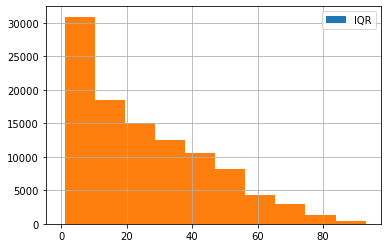

In [84]:
#Посмотрим, сколько у нас сетей рестаранов и создадим новый признак
net_restaurant = df.groupby(['restaurant_id']).restaurant_id.count().sort_values(ascending=False)
df['count_restaurant'] = df.apply(lambda row: net_restaurant[row['restaurant_id']], axis=1)
        # MAE: 0.09460565192527635
get_emission_filter('count_restaurant')
get_charts_col('count_restaurant')

In [85]:
#cписок id ресторанов 
list_id = list(df.groupby(['restaurant_id']).restaurant_id.count().index)
len(list_id)

11909

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].


count    104916.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: cuisine_count, dtype: float64

Количество заполненных значений - 104916 из 40000


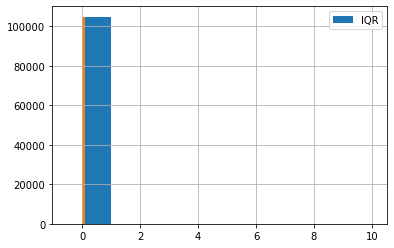

In [86]:
#Создадим столбец с количеством кухонь в ресторане
df['cuisine_count'] = df['cuisine_style'].str.count(',')+1
df['cuisine_count'].fillna(0, inplace=True)
# MAE: 0.099889439573008
get_emission_filter('cuisine_count')
get_charts_col('cuisine_count')

In [87]:
df.head(2)


,restaurant_id,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,count_restaurant,cuisine_count,delta,delta_today,_creole,afghani,african,albanian,american,arabic,argentinean,armenian,asian,australian,austrian,azerbaijani,...,'sri_lankan','cambodian','albanian','new_zealand','croatian','central_asian','filipino','tunisian','cajun_&_creole','romanian','georgian','polynesian','azerbaijani','caucasian','afghani','uzbek','salvadoran','yunnan','native_american','canadian','xinjiang','burmese','fujian','welsh','latvian'
0,id_5569,"[European, French, International]",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,9,0.0,41,1242,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,id_5569,"[European, French, International]",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,9,0.0,41,1242,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [88]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(df.select_dtypes(include=['object']), axis = 1)
y = df['rating']
X = X.drop('rating', axis = 1)

# пробуем заменять пропуски на среднее арифмитическое по столбцу
X.ranking = X.ranking.fillna(X.ranking.mean())
X['number_of_reviews'] = X['number_of_reviews'].fillna(X['number_of_reviews'].mean())
y = y.fillna(y.mean())

# Создаём, обучаем и тестируем модель

In [89]:
def create_train_test(X,y):
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    regr = RandomForestRegressor(n_estimators=100) # Создаём модель
    regr.fit(X_train, y_train) # Обучаем модель на тестовом наборе данных

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
    y_pred = regr.predict(X_test)

# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
    return 'MAE:', metrics.mean_absolute_error(y_test, y_pred)

In [90]:
create_train_test(X,y)

('MAE:', 0.08938808189408666)

# 4.1 Вопросы о ценах

In [39]:
# Сколько вариантов непустых значений встречается в столбце Price Range?
price = df['price_range'].unique()
print('В столбце "Price Range" непустых значений встречается ' + str(len(price)-1))

# Как в датафрейме обозначается самый низкий уровень цен и самый высокий уровень цен?
print('Самый низкий уровень цен обозначается символом: ' + price[3])
print('Самый высокий уровень цен обозначается символом: ' + price[2])

# Сколько ресторанов относятся к среднему ценовому сегменту?
count_mean = df['price_range'].loc[(df['price_range'] == '$$ - $$$')].count()
print('Количество ресторанов, относящихся к среднему ценовому сегменту равно '+ str(count_mean))

В столбце "Price Range" непустых значений встречается 3
Самый низкий уровень цен обозначается символом: $
Самый высокий уровень цен обозначается символом: $$$$
Количество ресторанов, относящихся к среднему ценовому сегменту равно 18412


# 4.2 Вопрос о городах

In [41]:
# Сколько городов представлено в наборе данных?
citys = []
for city in df.city:  # начинаем перебор всех городов
    if not(city in citys):  # если город ещё не встречался
        citys.append(city) # добавляем его к списку citys
        
len(citys)

31

In [62]:
#Попробуем внести внешние данные, добавим страны и посмотрим, что нам даст.
country = {'Paris': 'France', 'Stockholm': 'Sweden', 'London': 'Great_Britain', 'Berlin': 'Germany', 'Munich': 'Germany',
           'Oporto': 'Portugal', 'Milan': 'Italy', 'Bratislava': 'Slovakia', 'Vienna': 'Austria', 'Rome': 'Italy', 
           'Barcelona': 'Spain', 'Madrid': 'Spain', 'Dublin': 'Ireland', 'Brussels': 'Belgium', 'Zurich': 'Switzerland',
           'Warsaw': 'Poland', 'Budapest': 'Hungary', 'Copenhagen': 'Denmark', 'Amsterdam': 'Netherlands',
           'Lyon': 'France', 'Hamburg': 'Germany', 'Lisbon': 'Portugal', 'Prague': 'Czech', 'Oslo': 'Norway',
           'Helsinki': 'Finland', 'Edinburgh': 'Scotland', 'Geneva': 'Switzerland', 'Ljubljana': 'Slovenia',
           'Athens': 'Greece', 'Luxembourg': 'Luxembourg', 'Krakow': 'Poland'}
df['country'] = df.apply(lambda row: country[row['city']], axis=1)
df = pd.get_dummies(df, columns=[ 'country',], dummy_na=True)

25-й перцентиль: 821.0, 75-й перцентиль: 5575.0, IQR: 4754.0,  Границы выбросов: [-6310.0, 12706.0].


count    104916.000000
mean       3330.658794
std        3032.962470
min         174.000000
25%         821.000000
50%        2148.000000
75%        5575.000000
max        8982.000000
Name: сity_population, dtype: float64

Количество заполненных значений - 104916 из 40000


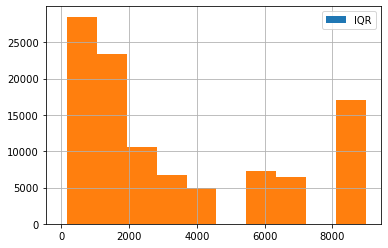

In [63]:
сity_population = dict_Сity_population= {'Paris': 2148, 'Stockholm': 975, 'London': 8982, 'Berlin': 3769, 'Munich': 1472,
           'Oporto': 214, 'Milan': 1352, 'Bratislava': 424, 'Vienna': 1897, 'Rome': 2873, 
           'Barcelona': 5575, 'Madrid': 6642, 'Dublin': 1388, 'Brussels': 174, 'Zurich': 402,
           'Warsaw': 1708, 'Budapest': 1752, 'Copenhagen': 602, 'Amsterdam': 821,
           'Lyon': 513, 'Hamburg': 1899, 'Lisbon': 504, 'Prague': 1309, 'Oslo': 681,
           'Helsinki': 631, 'Edinburgh': 482, 'Geneva': 499, 'Ljubljana': 279,
           'Athens': 664, 'Luxembourg': 613, 'Krakow': 769                                        }
df['сity_population'] = df.apply(lambda row: сity_population[row['city']], axis = 1)
get_emission_filter('сity_population')
get_charts_col('сity_population')

In [64]:
#создадим колонки с городами и проставим 1, там где находится ресторан, остальноые 0.
for item in citys:
    df[item] = df['city'].apply(find_item)   
    df[item].fillna(0, inplace=True) 
df = pd.get_dummies(df, columns=[ 'city',], dummy_na=True)

# 4.3 Вопросы о кухнях

In [42]:
# Сколько типов кухонь представлено в наборе данных?
сuisines = []
filtr_сuisine = df['cuisine_style'].dropna(how='any')
for сuisine in filtr_сuisine:
    сuisine = сuisine[1:-1].replace(", ", ",")
    сuisine = сuisine.split(',')
    for cuis in сuisine:
        if not(cuis in сuisines):  # если город ещё не встречался
            сuisines.append(cuis) # добавляем его к списку citys
            
len(сuisines)

125

In [43]:
# Какая кухня представлена в наибольшем количестве ресторанов?

search_сuisine = pd.Series()
for сuisine in сuisines:
    search_сuisine[сuisine] = df['cuisine_style'].str.contains(
        сuisine, na=False).value_counts()[True]

search_сuisine = pd.Series(search_сuisine)
search_сuisine.sort_values(ascending=False).index[0]

"'Vegetarian Friendly'"

In [59]:
search_сuisine.sort_values(ascending=False)

'Vegetarian Friendly'    11189
'European'               10060
'Mediterranean'           6277
'Italian'                 5964
'Vegan Options'           4486
                         ...  
'Salvadoran'                 1
'Yunnan'                     1
'Xinjiang'                   1
'Burmese'                    1
'Latvian'                    1
Length: 125, dtype: int64

In [66]:
# Какое среднее количество кухонь предлагается в одном ресторане? 
restoran_сuisine = df['cuisine_style'].str.count(',')+1
restoran_сuisine = restoran_сuisine.fillna(1)
round(restoran_сuisine.mean(),1)

1.0

# 4.4 Вопросы об отзывах

In [67]:
# Когда был оставлен самый свежий отзыв? 
reviews = pd.DataFrame([re.findall(r'\d{2}/\d{2}/\d{4}', x) for x in df.reviews]) #отбираю только даты
reviews.columns = ['data1', 'data2']
reviews.fillna('01/01/2000', inplace=True)
reviews['data1'] = pd.to_datetime(reviews['data1'])
reviews['data2'] = pd.to_datetime(reviews['data2'])
print(reviews.data1.max().strftime('%Y-%m-%d'))
print(reviews.data2.max().strftime('%Y-%m-%d'))

2018-02-26
2018-02-26


In [68]:
reviews.data2.isna().value_counts()

False    104916
Name: data2, dtype: int64

In [69]:
reviews.data1.isnull().sum()

0

In [70]:
#Какое максимальное количество дней отделяет даты публикации отзывов, размещённых на 
#сайте ресторана? 
reviews['data0'] = reviews.data1 - reviews.data2
print(reviews.data0.max())

6628 days 00:00:00


25-й перцентиль: 9.0, 75-й перцентиль: 142.0, IQR: 133.0,  Границы выбросов: [-190.5, 341.5].


count    104916.000000
mean        489.385871
std        1499.218145
min           0.000000
25%           9.000000
50%          43.000000
75%         142.000000
max        6626.000000
Name: delta, dtype: float64

Количество заполненных значений - 104916 из 40000


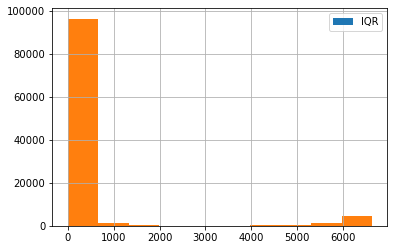

In [71]:
# создадим столбец с разницей последнего отзыва и текущей датой
df['delta'] = abs((reviews.data1 - reviews.data2).dt.days)
get_emission_filter('delta')
get_charts_col('delta')

25-й перцентиль: 1252.0, 75-й перцентиль: 1475.0, IQR: 223.0,  Границы выбросов: [917.5, 1809.5].


count    104916.000000
mean       1944.471501
std        1820.217513
min        1185.000000
25%        1252.000000
50%        1312.000000
75%        1475.000000
max        7816.000000
Name: delta_today, dtype: float64

Количество заполненных значений - 104916 из 40000


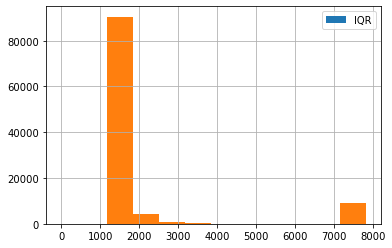

In [72]:
today = pd.to_datetime(datetime.now())
reviews['delta_today'] = reviews.apply(lambda row: (today - row.data1).days if row.data1 > row.data2 else (today - row.data2).days, axis=1)
df['delta_today'] = reviews['delta_today']
get_emission_filter('delta_today')
get_charts_col('delta_today')

In [73]:
df.head(2)

,restaurant_id,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,count_restaurant,cuisine_count,delta,delta_today,Creole,Afghani,African,Albanian,American,Arabic,Argentinean,Armenian,Asian,Australian,Austrian,Azerbaijani,...,'Sri Lankan','Cambodian','Albanian','New Zealand','Croatian','Central Asian','Filipino','Tunisian','Cajun & Creole','Romanian','Georgian','Polynesian','Azerbaijani','Caucasian','Afghani','Uzbek','Salvadoran','Yunnan','Native American','Canadian','Xinjiang','Burmese','Fujian','Welsh','Latvian'
0,id_5569,"[European, French, International]",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,3,3.0,41,1242,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,id_5569,"[European, French, International]",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,3,3.0,41,1242,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Задание 4.5 Итоги шага

In [74]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(df.select_dtypes(include=['object']), axis = 1)
y = df['rating']
X = X.drop(['rating'], axis = 1)

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104916 entries, 0 to 39999
Columns: 347 entries, ranking to 'Latvian'
dtypes: float64(3), int64(161), uint8(183)
memory usage: 152.9 MB


In [76]:
create_train_test(X,y)

('MAE:', 0.08832189561172743)